In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pyarrow.parquet as parquet
import fast_histogram as fh
import time
from quickbin import bin2d
from astropy.io import fits

In [9]:
nf = parquet.read_table("/home/bekah/gPhoton2/test_data/e23456/e23456-nd-b00_norowgroup.parquet",
                        columns=['col', 'row', 'ra', 'dec', 't', 'q'],  filters=[('col','>',0),('row','>',0),('col','<',800),('row','<',800)]).to_pandas()

In [4]:
nfrg = parquet.read_table("/home/bekah/gPhoton2/test_data/e23456/e23456-nd-b00.parquet", 
                            columns=['col', 'row', 'ra', 'dec', 't'], filters=[('col','>',-50)])


In [2]:
nfrg = parquet.ParquetFile("/home/bekah/gPhoton2/test_data/e23456/e23456-nd-b00.parquet")

In [11]:
nfrg.metadata.num_rows


35820492

In [12]:
nf = parquet.read_table("/home/bekah/Downloads/e01431-nd-b01.parquet",columns=['col', 'row', 'ra', 'dec', 't', 'q'],  filters=[('col','>',0),('row','>',0),('col','<',800),('row','<',800)]).to_pandas()

In [7]:
10.2 - 9

1.1999999999999993

In [8]:
11.2 - 9

2.1999999999999993

In [9]:
11.4 - 7.8

3.6000000000000005

In [10]:
3.6 - 2.2

1.4

In [4]:
from quickbin import bin2d
from astropy.io import fits

#nf = parquet.read_table("/home/bekah/Downloads/e01431-nd-b1.parquet",columns=['col', 'row', 'ra', 'dec', 't', 'q','flags'],  filters=[('col','>',0),('row','>',0),('col','<',800),('row','<',800)]).to_pandas()

leg = 1
eclipse = 1431 

data = bin2d(nf['col'],nf['row'],nf['ra'],n_bins=800,op=('count'))
new_hdu = fits.PrimaryHDU(data=data)
new_hdu.writeto(f"e0{eclipse}_b{leg}_ra_count.fits", overwrite=True)
data = bin2d(nf['col'],nf['row'],nf['q'],n_bins=800,op=('mean','std'))
new_hdu = fits.PrimaryHDU(data=data['mean'])
new_hdu.writeto(f"e0{eclipse}_b{leg}_q_mean.fits", overwrite=True)
new_hdu = fits.PrimaryHDU(data=data['std'])
new_hdu.writeto(f"e0{eclipse}_b{leg}_q_std.fits", overwrite=True)

In [24]:
nf = parquet.read_table("/home/bekah/gPhoton2/test_data/e01431/e01431-nd-b01.parquet",columns=['col', 'row', 'ra', 'dec', 't', 'q','flags'],  filters=[('col','>',0),('row','>',0),('col','<',800),('row','<',800),('flags','=',0)]).to_pandas()


In [27]:
flags = bin2d(nf['col'],nf['row'],nf['flags'],n_bins=800,op=('min'))
#new_hdu = fits.PrimaryHDU(data=data)
#new_hdu.writeto(f"e01431_b01_ra_max.fits", overwrite=True)
mean_q = bin2d(nf['col'],nf['row'],nf['q'],n_bins=800,op=('mean'))
mean_t = bin2d(nf['col'],nf['row'],nf['t'],n_bins=800,op=('mean'))
count = bin2d(nf['col'],nf['row'],nf['ra'],n_bins=800,op=('count'))


In [28]:
new_hdu = fits.PrimaryHDU(data=flags)
new_hdu.writeto(f"b01_flags_sum.fits", overwrite=True)

In [27]:
names = ['e01431-nd-b01-ffull-image-r.fits', 'e01431-nd-b04-ffull-image-r.fits', 'e01431-nd-b08-ffull-image-r.fits', 'e01431-nd-b11-ffull-image-r.fits']

for i in names: 
    path = "/home/bekah/gPhoton2/test_data/e01431/"+i 
    data = fits.open(path)
    cnt = data[1].data
    flg = data[2].data
    mask = data[3].data
    new_hdu = fits.PrimaryHDU(data=cnt)
    new_hdu.writeto(f"{i[0:14]}_count.fits", overwrite=True)
    new_hdu = fits.PrimaryHDU(data=flg)
    new_hdu.writeto(f"{i[0:14]}_flag.fits", overwrite=True)
    new_hdu = fits.PrimaryHDU(data=mask)
    new_hdu.writeto(f"{i[0:14]}_mask.fits", overwrite=True)

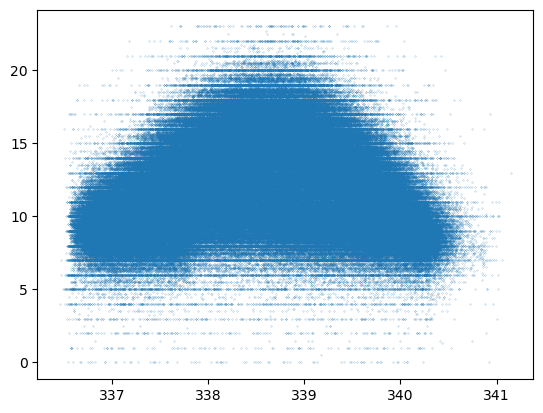

In [18]:
plt.scatter(np.ravel(mean_ra),np.ravel(mean_q),s=.02)

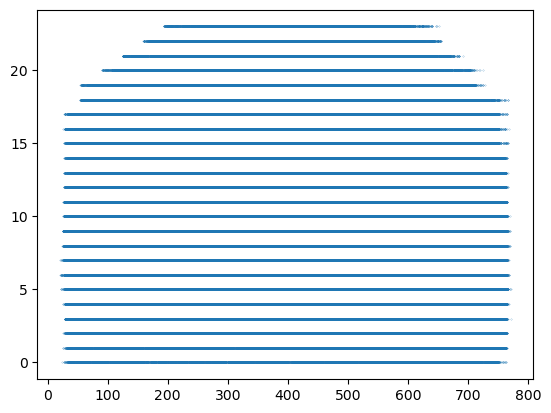

In [21]:
plt.scatter(nf['row'],nf['q'],s=.02)

In [30]:
legs = ['00','01','02','03','04','05','06','07','08','09','10','11']

df = pd.DataFrame()

for leg in legs: 
    nf = parquet.read_table(f"/home/bekah/gPhoton2/test_data/e01431/e01431-nd-b{leg}.parquet",columns=['col', 'row', 'ra', 'dec', 't', 'q','flags'],  filters=[('col','>',0),('row','>',0),('col','<',800),('row','<',800),('flags','=',0)]).to_pandas()
    df = pd.concat([df, nf], ignore_index=True)

count = bin2d(df['col'],df['row'],df['ra'],n_bins=800,op=('count'))
mean_q = bin2d(df['col'],df['row'],df['q'],n_bins=800,op=('mean'))
std_q = bin2d(df['col'],df['row'],df['q'],n_bins=800,op=('std'))

new_hdu = fits.PrimaryHDU(data=count)
new_hdu.writeto(f"all_count.fits", overwrite=True)
      
new_hdu = fits.PrimaryHDU(data=mean_q)
new_hdu.writeto(f"all_meanq.fits", overwrite=True)
                    
new_hdu = fits.PrimaryHDU(data=std_q)
new_hdu.writeto(f"all_stdq.fits", overwrite=True)

In [32]:
min_q = bin2d(df['col'],df['row'],df['q'],n_bins=800,op=('max'))
median_ra = bin2d(df['col'],df['row'],df['ra'],n_bins=800,op=('mean'))

new_hdu = fits.PrimaryHDU(data=median_ra)
new_hdu.writeto(f"all_medianra.fits", overwrite=True)
      
new_hdu = fits.PrimaryHDU(data=min_q)
new_hdu.writeto(f"all_minq.fits", overwrite=True)